In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report

# **EDA**

In [3]:
# importing the training dataset
train_df = pd.read_csv('/kaggle/input/amex-default-prediction/train_data.csv' , nrows = 150000)
train_df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827


In [4]:
train_df.shape

(150000, 190)

In [5]:
train_df.describe()

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
count,148853.000000,1.500000e+05,150000.000000,149945.000000,1.500000e+05,122091.000000,1.499450e+05,1.499450e+05,21937.000000,1.049570e+05,...,5289.000000,5.289000e+03,5289.000000,1.473680e+05,1.489350e+05,1.473680e+05,25728.000000,1.473680e+05,1.489210e+05,1.473680e+05
mean,0.653294,1.542638e-01,0.125569,0.617943,8.105151e-02,0.228447,6.188462e-02,1.339219e-01,0.178465,1.553179e-01,...,0.241840,1.586361e-02,0.169245,1.795735e-01,2.519906e-02,1.651858e-01,0.394714,1.794400e-01,5.428823e-02,6.261269e-02
std,0.246619,2.729504e-01,0.214400,0.401805,2.310256e-01,0.199097,2.046388e-01,2.347990e-01,0.216086,2.197234e-01,...,0.209830,1.032878e-01,0.265505,3.796262e-01,1.406977e-01,3.489471e-01,0.239638,3.794872e-01,1.867765e-01,1.943595e-01
min,-0.383019,4.038970e-07,-0.899396,0.000003,2.970408e-08,-0.254707,6.837608e-08,1.042180e-07,-0.000219,8.705647e-07,...,0.000001,4.129697e-08,0.000008,3.833695e-07,5.277736e-08,5.642931e-08,-0.014441,1.653580e-08,1.161969e-07,3.397747e-08
25%,0.477248,4.558752e-03,0.008896,0.102967,2.889575e-03,0.127647,2.904111e-03,5.285230e-03,0.038993,4.248374e-02,...,0.008915,2.639181e-03,0.003596,3.012560e-03,2.551577e-03,3.030616e-03,0.199200,3.030356e-03,2.753900e-03,3.034443e-03
50%,0.691403,9.093806e-03,0.032038,0.814205,5.785544e-03,0.164356,5.776616e-03,9.865770e-03,0.118644,8.787525e-02,...,0.253973,5.190416e-03,0.007117,6.046225e-03,5.104953e-03,6.053445e-03,0.382948,6.083040e-03,5.506479e-03,6.055643e-03
75%,0.863393,2.366296e-01,0.128609,1.002269,8.676497e-03,0.260447,8.653931e-03,1.615185e-01,0.244595,1.833541e-01,...,0.258378,7.679517e-03,0.501966,9.089227e-03,7.654893e-03,9.090181e-03,0.569446,9.085888e-03,8.272962e-03,9.086569e-03
max,1.009998,5.331360e+00,1.324053,1.010000,2.507711e+00,2.918675,5.465303e+00,1.625262e+00,3.252056,9.089694e+00,...,1.505785,1.009913e+00,1.509486,1.010000e+00,1.009994e+00,1.174753e+00,1.751388,1.010000e+00,1.343284e+00,4.282032e+00


In [6]:
# information about the dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Columns: 190 entries, customer_ID to D_145
dtypes: float64(185), int64(1), object(4)
memory usage: 217.4+ MB


In [7]:
# get the number of unique elements in the dataset
train_df.nunique()

customer_ID     12441
S_2               396
P_2            148853
D_39           150000
B_1            150000
                ...  
D_141          147368
D_142           25728
D_143          147368
D_144          148921
D_145          147368
Length: 190, dtype: int64

In [8]:
# it is noticed that out of 150000 samples only 12441 unique customers are available

In [9]:
train_labels = pd.read_csv('/kaggle/input/amex-default-prediction/train_labels.csv' , nrows = 150000)
train_labels.head()

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0


In [10]:
# get the number of unique elements in the dataset
train_labels.nunique()

customer_ID    150000
target              2
dtype: int64

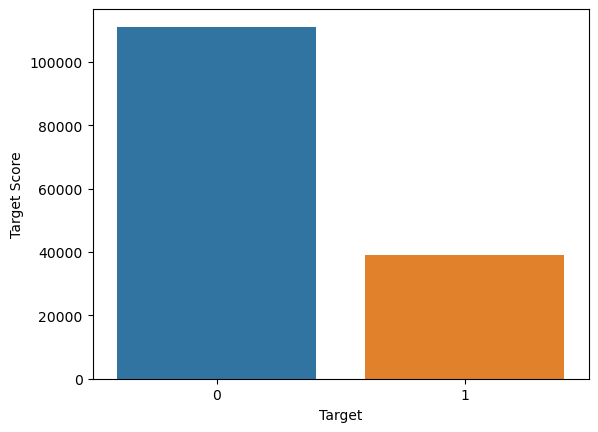

In [11]:
# Check target value distribution
plt.figure(dpi=100)
sns.countplot(data=train_labels, x='target')
plt.xlabel('Target')
plt.ylabel('Target Score')
plt.show()

In [12]:
train_labels['target'].value_counts()

0    111096
1     38904
Name: target, dtype: int64

In [13]:
# merge the two dataframes based on customer_ID
train_df = pd.merge(train_df , train_labels , on='customer_ID')
train_df.head()

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674,0
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217,0
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603,0
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600,0
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827,0


In [14]:
# get the number of unique elements in the dataset
train_df.nunique()

customer_ID     12441
S_2               396
P_2            148853
D_39           150000
B_1            150000
                ...  
D_142           25728
D_143          147368
D_144          148921
D_145          147368
target              2
Length: 191, dtype: int64

In [15]:
# Correlation matrix
# Calculate the correlation matrix
corr_matrix = train_df.corr()
corr_matrix

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
P_2,1.000000,-0.202116,-0.367193,0.545817,-0.472193,-0.334094,-0.326655,-0.453035,-0.460359,-0.292485,...,-0.025714,-0.020680,-0.185093,-0.135859,-0.180211,0.107558,-0.185145,0.006159,-0.165915,-0.615906
D_39,-0.202116,1.000000,0.181594,-0.199998,0.198921,0.062649,0.446685,0.171713,0.079500,0.047231,...,-0.019641,0.037139,0.032172,0.025831,0.032256,0.025670,0.032186,0.008947,0.029792,0.192980
B_1,-0.367193,0.181594,1.000000,-0.626609,0.225845,0.154947,0.193933,0.720949,-0.056050,0.051224,...,0.007338,-0.004475,0.111963,0.057724,0.110073,-0.035879,0.111907,0.026193,0.093044,0.378034
B_2,0.545817,-0.199998,-0.626609,1.000000,-0.305597,-0.231656,-0.265895,-0.716183,-0.089674,-0.127801,...,-0.017341,-0.022602,-0.153971,-0.091633,-0.151576,0.029058,-0.154130,-0.041443,-0.131325,-0.470903
R_1,-0.472193,0.198921,0.225845,-0.305597,1.000000,0.210079,0.281145,0.269517,0.161964,0.175510,...,0.006195,0.039786,0.078815,0.066408,0.077541,-0.000502,0.078920,0.006796,0.079237,0.369938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D_142,0.107558,0.025670,-0.035879,0.029058,-0.000502,-0.092377,0.013521,-0.008730,-0.118999,-0.057213,...,-0.040977,-0.035939,-0.002758,-0.059178,0.779886,1.000000,0.008723,0.450641,0.122385,-0.068695
D_143,-0.185145,0.032186,0.111907,-0.154130,0.078920,0.042228,0.051094,0.136090,-0.013647,0.058695,...,-0.005335,-0.135768,0.999425,0.311863,0.997595,0.008723,1.000000,0.577056,0.644678,0.126601
D_144,0.006159,0.008947,0.026193,-0.041443,0.006796,-0.014378,0.006680,0.034369,-0.080769,-0.012749,...,-0.016789,-0.073887,0.577311,-0.037778,0.604647,0.450641,0.577056,1.000000,0.222325,-0.017381
D_145,-0.165915,0.029792,0.093044,-0.131325,0.079237,0.030790,0.052650,0.123155,0.003624,0.052496,...,-0.004732,-0.083068,0.644516,0.207186,0.630764,0.122385,0.644678,0.222325,1.000000,0.122789


In [16]:
# dropping the highly correlated features
# Create correlation matrix
corr_matrix = train_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

# Drop features 
train_df.drop(to_drop, axis=1, inplace=True)

In [17]:
to_drop

['B_11',
 'S_7',
 'D_55',
 'B_13',
 'D_61',
 'B_15',
 'B_18',
 'B_20',
 'B_23',
 'D_74',
 'D_75',
 'D_77',
 'D_88',
 'B_33',
 'S_24',
 'D_104',
 'D_107',
 'B_37',
 'D_110',
 'D_111',
 'B_39',
 'D_118',
 'D_119',
 'B_42',
 'D_131',
 'D_132',
 'D_141',
 'D_143']

In [18]:
len(to_drop)

28

In [19]:
# visulalize the relationship between each pair of attributes using a scatter matrix
# scatter matrix will get different colors based on the target value
# sns.pairplot(train_df , hue='target' , palette='husl')

In [20]:
# Visualize the distribution of data for each attribute using a box plot for each class
# we need to group by the quality and count the no of records with that relevant quality

# we need to loop through the all of the columns except 'qaulity' column
# for i in range(len(train_df.columns) - 1):

#   # to seperate the plots from overlapping
#   print('\n')

#   # set the figure size
#   plt.figure(figsize=(10, 6))

#   # use quality column for color encoding(as legend) by setting the hue value
#   sns.boxplot(x = 'target' , y = train_df.columns[i] , data = train_df , palette = sns.color_palette('bright'))

#   # set the title
#   plt.title(f'Target distribution over {train_df.columns[i]}')

#   # set legend
#   # NOTE : setting the hue value will show strange behaviour in the plot so it is commented
#   # plt.legend(title="Wine Quality", loc="upper right" , fontsize=8)

#   # set the label of the x-axis
#   plt.xlabel('Target')

#   # set the label for the y-axis
#   plt.ylabel(f'{train_df.columns[i]}')

#   # show the plot
#   plt.show()

In [21]:
# find the mean of each and every column
train_df.mean()

P_2       0.653294
D_39      0.154264
B_1       0.125569
B_2       0.617943
R_1       0.081052
            ...   
D_140     0.025199
D_142     0.394714
D_144     0.054288
D_145     0.062613
target    0.252693
Length: 159, dtype: float64

In [22]:
# !pip install pandas-profiling

In [23]:
# # import the required libraries
# import pandas_profiling

# # Generate a data profiling report
# profile = train_df.profile_report()

# # call this function to start generating the report
# profile

# **Handling the missing values**

In [24]:
# checking the columns for missing values
train_df.isnull().sum()

customer_ID         0
S_2                 0
P_2              1147
D_39                0
B_1                 0
                ...  
D_140            1065
D_142          124272
D_144            1079
D_145            2632
target              0
Length: 163, dtype: int64

In [25]:
# calculate the missing value percentage
train_df.isna().mean() * 100

customer_ID     0.000000
S_2             0.000000
P_2             0.764667
D_39            0.000000
B_1             0.000000
                 ...    
D_140           0.710000
D_142          82.848000
D_144           0.719333
D_145           1.754667
target          0.000000
Length: 163, dtype: float64

In [26]:
# we can drop the columns that higher missing value percentage
# Assuming 'df' is your DataFrame
threshold = 0.3  # 30% threshold

# Calculate the missing value percentage for each column
missing_percentage = train_df.isnull().mean() * 100

# Get the columns with missing percentage greater than the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# Drop the columns from the DataFrame
train_df = train_df.drop(columns=columns_to_drop)

# Now 'df' contains the DataFrame with columns dropped if missing percentage > 30%

In [27]:
columns_to_drop

Index(['P_2', 'S_3', 'D_42', 'D_43', 'D_44', 'D_46', 'D_48', 'D_49', 'B_8',
       'D_50', 'D_52', 'P_3', 'D_53', 'D_56', 'S_9', 'D_59', 'D_62', 'D_64',
       'B_17', 'D_66', 'D_68', 'D_69', 'D_70', 'D_72', 'D_73', 'D_76', 'D_78',
       'D_79', 'R_9', 'D_80', 'D_81', 'D_82', 'D_83', 'D_84', 'B_29', 'D_87',
       'D_89', 'D_91', 'S_22', 'D_102', 'D_103', 'D_105', 'D_106', 'R_26',
       'R_27', 'D_108', 'S_27', 'D_113', 'D_114', 'D_115', 'D_116', 'D_117',
       'D_120', 'D_121', 'D_122', 'D_123', 'D_124', 'D_125', 'D_126', 'D_128',
       'D_129', 'D_130', 'D_133', 'D_134', 'D_135', 'D_136', 'D_137', 'D_138',
       'D_139', 'D_140', 'D_142', 'D_144', 'D_145'],
      dtype='object')

In [28]:
# number of columns dropped
len(columns_to_drop)

73

In [29]:
# get the remaining categorical columns after dropping the rows
categorical_cols = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120','D_126','D_63', 'D_64', 'D_66']

remaining_categorical = []

for col in categorical_cols:
    if col in train_df.columns:
        remaining_categorical.append(col)

remaining_categorical

['B_30', 'B_38', 'D_63']

In [30]:
train_df['B_30'].unique()

array([ 0.,  2.,  1., nan])

In [31]:
train_df['B_38'].unique()

array([ 2.,  1.,  3.,  5.,  6.,  7.,  4., nan])

In [32]:
train_df['D_63'].unique()

array(['CR', 'CO', 'CL', 'XZ', 'XM', 'XL'], dtype=object)

In [33]:
# It is observed that B_30 and B_38 contains Null values

In [34]:
# before standardization
train_df.mean()

D_39      0.154264
B_1       0.125569
B_2       0.617943
R_1       0.081052
D_41      0.061885
            ...   
B_40      0.180231
D_127     0.104964
B_41      0.031358
R_28      0.005930
target    0.252693
Length: 87, dtype: float64

In [35]:
# before standardization
train_df.std()

D_39      0.272950
B_1       0.214400
B_2       0.401805
R_1       0.231026
D_41      0.204639
            ...   
B_40      0.450898
D_127     0.299961
B_41      0.213386
R_28      0.030564
target    0.434558
Length: 87, dtype: float64

# **Data Preprocessing**

In [36]:
# removing customer_ID and S_2 columns before standardization
train_df.drop(['customer_ID' , 'S_2'] , axis = 1 , inplace=True)

In [37]:
# fill the columns with mode of that column
for column in ['B_30','B_38']:
    mode_value = train_df[column].mode()[0]
    train_df[column].fillna(mode_value, inplace=True)

In [38]:
# do label encoding
# Import label encoder
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
train_df['D_63']= label_encoder.fit_transform(train_df['D_63'])
  
train_df['D_63'].unique()

array([2, 1, 0, 5, 4, 3])

In [39]:
train_df.head()

,D_39,B_1,B_2,R_1,D_41,B_3,B_4,D_45,B_5,R_2,...,S_26,B_36,B_38,D_109,D_112,B_40,D_127,B_41,R_28,target
0,0.001733,0.008724,1.006838,0.009228,0.008771,0.004709,0.080986,0.708906,0.170600,0.006204,...,0.001243,0.009968,2.0,0.004326,1.007336,0.210060,1.003319,0.006805,0.001535,0
1,0.005775,0.004923,1.000653,0.006151,0.000798,0.002714,0.069419,0.712795,0.113239,0.006206,...,0.004561,0.003921,2.0,0.008707,1.007653,0.184093,1.008394,0.004407,0.004931,0
2,0.091505,0.021655,1.009672,0.006815,0.007598,0.009423,0.068839,0.720884,0.060492,0.003259,...,0.011736,0.001264,2.0,0.004092,1.004312,0.154837,1.009307,0.003221,0.009123,0
3,0.002455,0.013683,1.002700,0.001373,0.000685,0.005531,0.055630,0.723997,0.166782,0.009918,...,0.007571,0.002729,2.0,0.009703,1.002538,0.153939,1.001671,0.007703,0.002409,0
4,0.002483,0.015193,1.000727,0.007605,0.004653,0.009312,0.038862,0.720619,0.143630,0.006667,...,0.018200,0.009998,2.0,0.009120,1.000130,0.120717,1.009886,0.009823,0.004462,0


In [40]:
# upto this point all the categorical columns are label encoded or dropped 
# now we can process the columns with numerical data
train_df = train_df.fillna(train_df.mean())
train_df.head()

,D_39,B_1,B_2,R_1,D_41,B_3,B_4,D_45,B_5,R_2,...,S_26,B_36,B_38,D_109,D_112,B_40,D_127,B_41,R_28,target
0,0.001733,0.008724,1.006838,0.009228,0.008771,0.004709,0.080986,0.708906,0.170600,0.006204,...,0.001243,0.009968,2.0,0.004326,1.007336,0.210060,1.003319,0.006805,0.001535,0
1,0.005775,0.004923,1.000653,0.006151,0.000798,0.002714,0.069419,0.712795,0.113239,0.006206,...,0.004561,0.003921,2.0,0.008707,1.007653,0.184093,1.008394,0.004407,0.004931,0
2,0.091505,0.021655,1.009672,0.006815,0.007598,0.009423,0.068839,0.720884,0.060492,0.003259,...,0.011736,0.001264,2.0,0.004092,1.004312,0.154837,1.009307,0.003221,0.009123,0
3,0.002455,0.013683,1.002700,0.001373,0.000685,0.005531,0.055630,0.723997,0.166782,0.009918,...,0.007571,0.002729,2.0,0.009703,1.002538,0.153939,1.001671,0.007703,0.002409,0
4,0.002483,0.015193,1.000727,0.007605,0.004653,0.009312,0.038862,0.720619,0.143630,0.006667,...,0.018200,0.009998,2.0,0.009120,1.000130,0.120717,1.009886,0.009823,0.004462,0


In [41]:
# get all columns except the categorical ones
to_be_std = train_df.loc[: , ~train_df.columns.isin(['B_30', 'B_38', 'D_63'])]
to_be_std

,D_39,B_1,B_2,R_1,D_41,B_3,B_4,D_45,B_5,R_2,...,S_25,S_26,B_36,D_109,D_112,B_40,D_127,B_41,R_28,target
0,0.001733,0.008724,1.006838,0.009228,0.008771,0.004709,0.080986,0.708906,0.170600,0.006204,...,0.974539,0.001243,0.009968,0.004326,1.007336,0.210060,1.003319,0.006805,0.001535,0
1,0.005775,0.004923,1.000653,0.006151,0.000798,0.002714,0.069419,0.712795,0.113239,0.006206,...,0.975624,0.004561,0.003921,0.008707,1.007653,0.184093,1.008394,0.004407,0.004931,0
2,0.091505,0.021655,1.009672,0.006815,0.007598,0.009423,0.068839,0.720884,0.060492,0.003259,...,0.974067,0.011736,0.001264,0.004092,1.004312,0.154837,1.009307,0.003221,0.009123,0
3,0.002455,0.013683,1.002700,0.001373,0.000685,0.005531,0.055630,0.723997,0.166782,0.009918,...,0.975499,0.007571,0.002729,0.009703,1.002538,0.153939,1.001671,0.007703,0.002409,0
4,0.002483,0.015193,1.000727,0.007605,0.004653,0.009312,0.038862,0.720619,0.143630,0.006667,...,0.978027,0.018200,0.009998,0.009120,1.000130,0.120717,1.009886,0.009823,0.004462,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,0.325583,0.031484,1.007082,0.000475,0.009825,0.005160,0.014314,0.464059,0.056493,0.008305,...,0.971323,0.001194,0.008910,0.003202,1.005647,0.012009,0.001021,0.007554,0.002665,0
149996,0.265633,0.042481,1.001512,0.009380,0.008640,0.007882,0.026987,0.459581,0.038628,0.009604,...,0.975577,0.002000,0.008396,0.005569,1.002542,0.117961,0.009391,0.000794,0.008149,0
149997,0.066652,0.026125,1.006111,0.002654,0.005901,0.000496,0.021982,0.468105,0.082524,0.009243,...,0.978692,0.004028,0.002555,0.001941,1.004439,0.032487,0.001231,0.001846,0.006718,0
149998,0.382879,0.040909,1.009000,0.005071,0.005578,0.004704,0.018223,0.466008,0.078256,0.006076,...,0.978623,0.004992,0.009298,0.009513,1.006653,0.027681,0.009491,0.006945,0.007699,0


In [42]:
# import the libraries required for standardization
from sklearn.preprocessing import StandardScaler

# get all columns except the categorical ones
to_be_std = train_df.loc[: , ~train_df.columns.isin(['B_30', 'B_38', 'D_63'])]

# initialize scaler
scaler = StandardScaler()

# standardize data
standardized_data = scaler.fit_transform(to_be_std)

# convert numpy array back to pandas dataframe
to_be_std = pd.DataFrame(standardized_data, columns=to_be_std.columns)

In [43]:
to_be_std.head()

,D_39,B_1,B_2,R_1,D_41,B_3,B_4,D_45,B_5,R_2,...,S_25,S_26,B_36,D_109,D_112,B_40,D_127,B_41,R_28,target
0,-0.558823,-0.544985,0.968051,-0.310892,-0.259596,-0.550414,-0.421113,1.880354,0.154314,-0.211778,...,0.240587,-0.133532,0.140015,-0.053097,0.456228,0.066156,2.994912,-0.115074,-0.143805,-0.581497
1,-0.544014,-0.562714,0.952655,-0.324209,-0.298563,-0.558915,-0.473032,1.896362,0.052125,-0.211770,...,0.245688,-0.127099,-0.114257,0.083601,0.457079,0.008565,3.011832,-0.126312,-0.032673,-0.581497
2,-0.229927,-0.484676,0.975105,-0.321335,-0.265332,-0.530336,-0.475637,1.929665,-0.041841,-0.225949,...,0.238374,-0.113188,-0.225973,-0.060384,0.448114,-0.056319,3.014873,-0.131872,0.104459,-0.581497
3,-0.556178,-0.521856,0.957751,-0.344894,-0.299117,-0.546913,-0.534925,1.942483,0.147512,-0.193909,...,0.245098,-0.121264,-0.164360,0.114682,0.443353,-0.058310,2.989417,-0.110863,-0.115201,-0.581497
4,-0.556076,-0.514812,0.952839,-0.317917,-0.279725,-0.530809,-0.610188,1.928576,0.106268,-0.209549,...,0.256971,-0.100653,0.141270,0.096487,0.436891,-0.131989,3.016804,-0.100927,-0.048018,-0.581497


In [44]:
# do onehot encoding
train_df = pd.get_dummies(train_df , columns=['B_30', 'B_38', 'D_63'])

In [45]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Columns: 101 entries, D_39 to D_63_5
dtypes: float64(83), int64(2), uint8(16)
memory usage: 100.7 MB


In [46]:
# get all the columns that has null values
train_df.columns[train_df.isnull().any()]

Index([], dtype='object')

In [47]:
# get the X , y values
X = train_df.drop(['target'] , axis = 1)
y = train_df['target']

In [48]:
X.head()

,D_39,B_1,B_2,R_1,D_41,B_3,B_4,D_45,B_5,R_2,...,B_38_4.0,B_38_5.0,B_38_6.0,B_38_7.0,D_63_0,D_63_1,D_63_2,D_63_3,D_63_4,D_63_5
0,0.001733,0.008724,1.006838,0.009228,0.008771,0.004709,0.080986,0.708906,0.170600,0.006204,...,0,0,0,0,0,0,1,0,0,0
1,0.005775,0.004923,1.000653,0.006151,0.000798,0.002714,0.069419,0.712795,0.113239,0.006206,...,0,0,0,0,0,0,1,0,0,0
2,0.091505,0.021655,1.009672,0.006815,0.007598,0.009423,0.068839,0.720884,0.060492,0.003259,...,0,0,0,0,0,0,1,0,0,0
3,0.002455,0.013683,1.002700,0.001373,0.000685,0.005531,0.055630,0.723997,0.166782,0.009918,...,0,0,0,0,0,0,1,0,0,0
4,0.002483,0.015193,1.000727,0.007605,0.004653,0.009312,0.038862,0.720619,0.143630,0.006667,...,0,0,0,0,0,0,1,0,0,0


In [49]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [50]:
# after standardization
X.mean()

D_39      0.154264
B_1       0.125569
B_2       0.617943
R_1       0.081052
D_41      0.061885
            ...   
D_63_1    0.740467
D_63_2    0.172380
D_63_3    0.001267
D_63_4    0.001580
D_63_5    0.004647
Length: 100, dtype: float64

In [51]:
# after standardization
X.std()

D_39      0.272950
B_1       0.214400
B_2       0.401731
R_1       0.231026
D_41      0.204601
            ...   
D_63_1    0.438380
D_63_2    0.377712
D_63_3    0.035568
D_63_4    0.039718
D_63_5    0.068008
Length: 100, dtype: float64

# **Logistic Regression**

In [52]:
from sklearn.model_selection import train_test_split

# # Split the data into training and testing sets (80% training, 20% testing)
# The random_state parameter is used to ensure reproducibility of the results.
# By setting it to a specific value (in this case, 42),
# the random shuffling and splitting of the data will be the same every time the code is executed.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [53]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the logistic regression model
logreg_model = LogisticRegression()

# Fit the model to the training data
logreg_model.fit(X_train, y_train)

LogisticRegression()

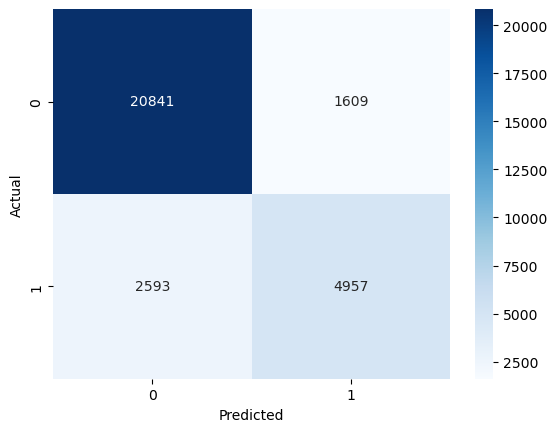

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict the labels of the test set
y_pred = logreg_model.predict(X_test)

# Create confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# plot confusion matrix using seaborn
plt.figure(dpi=100)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [55]:
# Evaluate the model on the test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     22450
           1       0.75      0.66      0.70      7550

    accuracy                           0.86     30000
   macro avg       0.82      0.79      0.81     30000
weighted avg       0.86      0.86      0.86     30000



In [56]:
from sklearn.metrics import accuracy_score

# Define the evaluation metric
def evaluate_model(X_train, X_test, y_train, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

split_ratios = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4 , 0.45 , 0.5 , 0.55 , 0.6 , 0.65 , 0.7 , 0.75 , 0.8]

results = []
for split_ratio in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=42)
    accuracy = evaluate_model(X_train, X_test, y_train, y_test)
    results.append((split_ratio, accuracy))

print("Split Ratio\tAccuracy")
for split_ratio, accuracy in results:
    print(f"{split_ratio}\t\t{accuracy}")

# Find the optimal split ratio with the highest accuracy
optimal_split = max(results, key=lambda x: x[1])
print("Optimal Split Ratio:", optimal_split[0])

Split Ratio	Accuracy
0.1		0.8578666666666667
0.15		0.8584
0.2		0.8599333333333333
0.25		0.85984
0.3		0.8598888888888889
0.35		0.860247619047619
0.4		0.8596166666666667
0.45		0.8590814814814814
0.5		0.85892
0.55		0.8583030303030303
0.6		0.8577555555555556
0.65		0.8581538461538462
0.7		0.8577047619047619
0.75		0.8574044444444444
0.8		0.856475
Optimal Split Ratio: 0.35


In [57]:
# from sklearn.model_selection import GridSearchCV

# # Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.35 , random_state=42)

# # Create a list of hyperparameters to tune
# hyperparameters = {
#     'C': [0.1, 1 , 10 , 100],
#     'penalty': ['l1', 'l2' , 'elasticnet', 'none'],
#     'solver': ['liblinear', 'lbfgs' , 'saga' , 'newton-cg' , 'sag'],
#     'max_iter': [100, 200 , 300]
# }

# # Create a grid of hyperparameters
# # Perform grid search using cross-validation
# grid = GridSearchCV(LogisticRegression(), hyperparameters, cv=5)

# # Train a model for each combination of hyperparameters in the grid
# grid.fit(X_train, y_train)

# # Predict the labels of the test set
# y_pred = grid.predict(X_test)

# # Evaluate the models on the test set
# accuracy = accuracy_score(y_test , y_pred)

# # Choose the model with the best performance on the test set
# # best_model = grid.best_estimator_
# best_model = grid.best_params_
# best_score = grid.best_score_

# print(f'Best model: {best_model}')
# print(f'Accuracy: {accuracy}')

In [58]:
from sklearn.metrics import f1_score

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.35 , random_state=42)

# Create a linear regression model
model = LogisticRegression(penalty='l2' , C = 1 , solver = 'saga' , max_iter = 200)

# Train the model on the training set
model.fit(X_train , y_train)

# Predict the labels of the test set
y_pred = model.predict(X_test)

# Evaluate the model on the test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     39223
           1       0.75      0.59      0.66     13277

    accuracy                           0.84     52500
   macro avg       0.81      0.76      0.78     52500
weighted avg       0.84      0.84      0.84     52500



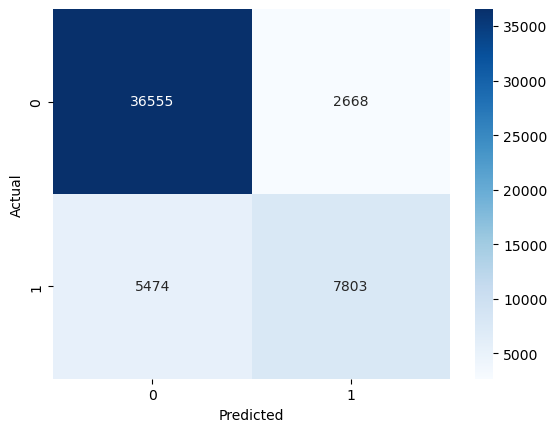

In [59]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# plot confusion matrix using seaborn
plt.figure(dpi=100)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Balanced Random Forest Classifier**

In [60]:
from imblearn.ensemble import BalancedRandomForestClassifier

# create the randomForestClassifier with default params
clf = BalancedRandomForestClassifier()

# fit the classifier for 
clf.fit(X_train , y_train)
y_pred = clf.predict(X_test)

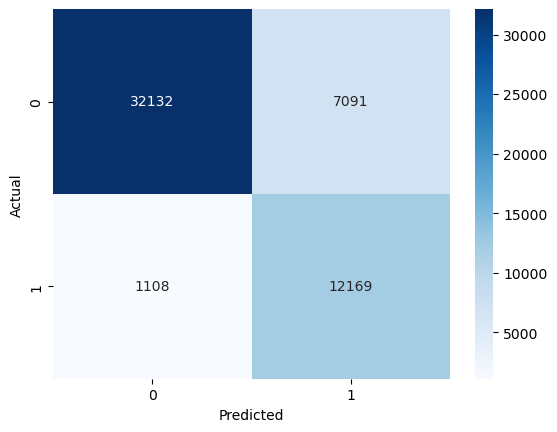

In [61]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# plot confusion matrix using seaborn
plt.figure(dpi=100)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [62]:
# Evaluate the model on the test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89     39223
           1       0.63      0.92      0.75     13277

    accuracy                           0.84     52500
   macro avg       0.80      0.87      0.82     52500
weighted avg       0.88      0.84      0.85     52500



# **XGBoost Classifier**

In [63]:
import xgboost as xgb

# declare parameters
params = {
            'objective':'reg:logistic',
            'random_state': 42,
        }

xgb_model = xgb.XGBClassifier(**params)
xgb_model.fit(X_train, y_train)

# do the prediction
y_pred = xgb_model.predict(X_test)

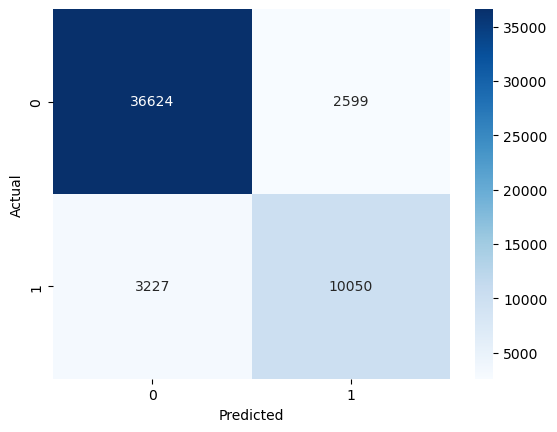

In [64]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# plot confusion matrix using seaborn
plt.figure(dpi=100)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [65]:
# Evaluate the model on the test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93     39223
           1       0.79      0.76      0.78     13277

    accuracy                           0.89     52500
   macro avg       0.86      0.85      0.85     52500
weighted avg       0.89      0.89      0.89     52500



# **Handling the class imbalance**

In [66]:
# imbalance percentage
train_df['target'].value_counts().min()

37904

In [67]:
# imbalance percentage
print(f"{train_df['target'].value_counts().min() / train_df['target'].count() * 100 : .3f}%")

 25.269%


In [68]:
# decided to go with Oversampling(creating more duplicates from the minority class)
from imblearn.over_sampling import SMOTE

# Apply SMOTE oversampling to the training data
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [69]:
X_train_resampled.shape[0]

145746

In [70]:
y_train_resampled.shape[0]

145746

In [71]:
# after oversampling tried to get the results from Logistic regression model
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)

# Evaluate the performance of the model on the resampled test data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88     39223
           1       0.62      0.85      0.72     13277

    accuracy                           0.83     52500
   macro avg       0.78      0.84      0.80     52500
weighted avg       0.86      0.83      0.84     52500



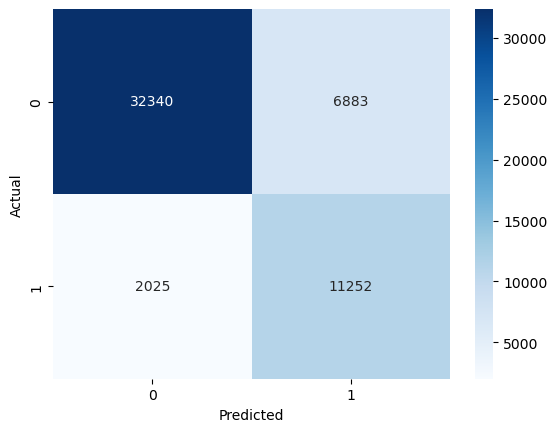

In [72]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# plot confusion matrix using seaborn
plt.figure(dpi=100)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [73]:
# after oversampling tried to get the results from Random Forest Classifier
clf.fit(X_train_resampled, y_train_resampled)
y_pred = clf.predict(X_test)

# Evaluate the performance of the model on the resampled test data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92     39223
           1       0.72      0.84      0.78     13277

    accuracy                           0.88     52500
   macro avg       0.83      0.87      0.85     52500
weighted avg       0.89      0.88      0.88     52500



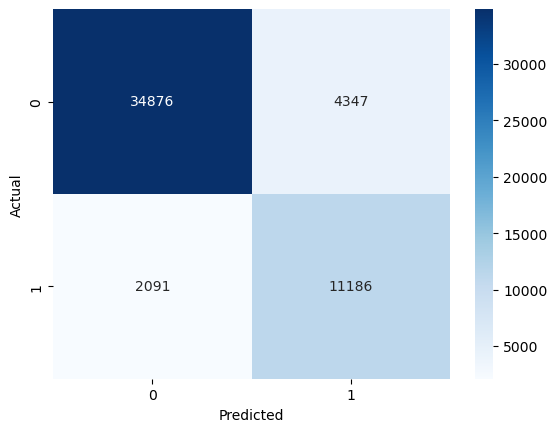

In [74]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# plot confusion matrix using seaborn
plt.figure(dpi=100)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [75]:
# after oversampling tried to get the results from Random Forest Classifier
xgb_model.fit(X_train_resampled, y_train_resampled)
y_pred = xgb_model.predict(X_test)

# Evaluate the performance of the model on the resampled test data
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91     39223
           1       0.73      0.78      0.76     13277

    accuracy                           0.87     52500
   macro avg       0.83      0.84      0.83     52500
weighted avg       0.88      0.87      0.87     52500



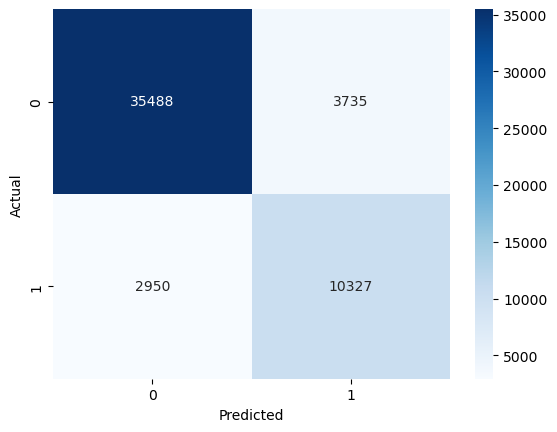

In [76]:
# Create confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# plot confusion matrix using seaborn
plt.figure(dpi=100)
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Checking for Overfitting

In [77]:
# logistic regression model
y_train_pred = model.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.82      0.88     72873
           1       0.62      0.85      0.72     24627

    accuracy                           0.83     97500
   macro avg       0.78      0.84      0.80     97500
weighted avg       0.86      0.83      0.84     97500



In [78]:
# balanced random forest classifier
y_train_pred = clf.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     72873
           1       1.00      1.00      1.00     24627

    accuracy                           1.00     97500
   macro avg       1.00      1.00      1.00     97500
weighted avg       1.00      1.00      1.00     97500



In [79]:
# xgb
y_train_pred = xgb_model.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95     72873
           1       0.84      0.87      0.85     24627

    accuracy                           0.92     97500
   macro avg       0.90      0.91      0.90     97500
weighted avg       0.93      0.92      0.92     97500



# **Save the Model**

In [ ]:
import joblib

# save
joblib.dump(model, "model_logreg.pkl" , compress=9) 
joblib.dump(clf, "model_clf.pkl" , compress=9) 
joblib.dump(xgb_model, "model_xgb.pkl" , compress=9) 
